In [36]:
%matplotlib inline

import numpy as np
import scipy as sp   # scipy is a popular scientific computing library for Python
import scipy.stats   # statistics package
import matplotlib.pyplot as plt

# Lec 03: Optimization and Linear Regression

1. 1D optimization: pencil-paper + computer algebra system
2. 1D optimization: grid-search
3. Aside: Taylor series
4. 1D optimization: gradient descent
5. Multivariate optimization: pencil-paper
6. Multivariate optimization: grid-search + curse of dimensionality
7. Aside: Multivariate Taylor series
8. Multivariate optimization: gradient descent
9. Optimization perspective of linear regression

## Review

## Optimization

1. Today we'll only look at **continuous optimization**, i.e., looking for parameters in $\mathbb{R}^D$.
2. Discrete optimization, i.e., looking for parameters in a discrete set, is another topic in itself.
3. Optimization is a **fundamental** problem in STEM fields because many problems can be formulated as a minimum or maximum of some function, and these points are obtained by optimization. 

## 1-D Continuous Optimization

1. Let's start with the basics where we look for a parameter in $\mathbb{R}$.

### Example

\begin{align*}
f(x) & = 0.012 + 0.026x - 0.25x^2 - 0.2x^3 + x^4
\end{align*}

In [37]:
def f(x):
    return 0.012 + 0.026*x - 0.25*x**2 - 0.2*x**3 + x**4

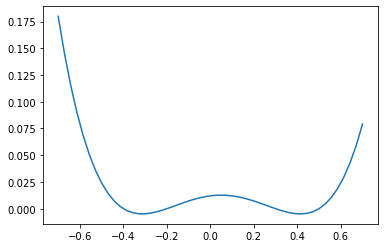

In [38]:
# Ploting
xs = np.linspace(-.7, .7)
ys = [f(x) for x in xs]
plt.plot(xs, ys)

### Goal of Optimization

1. Find the minimum point on the function.
2. Mathematically we write it as such:
$$
\mathop{\mathrm{argmin}}_{\theta \in \Theta} f(\theta)
$$
where $\Theta$ is a parameter space. In our 1D continuous case, it is $\mathbb{R}$.
3. The operator $\mathop{\mathrm{argmin}}$ means give me the value of $\theta$ that minimizes $f$ instead of the value $f(\theta)$.

### Optimization Strategies

We'll now go through several optimization strategies on this example.

### Optimization Strategy 1: Pencil-Paper

Recalling some basic calculus, the **derivative** of the function should be $0$ for it to be a saddle point.

#### Set derivative to 0

As a reminder,
\begin{align*}
f(\theta) = 0.012 + 0.026\theta - 0.25\theta^2 - 0.2\theta^3 + \theta^4
\end{align*}

A necessary condition for $\theta$ to be a minimum/maximum is that
\begin{align*}
\frac{d}{d\theta}f & = 0.026 - 2 \cdot .25 \theta -3 \cdot .2 \theta^2 + 4\theta^3 \\
              & = 0.026 - .5 \theta -.6 \theta^2 + 4\theta^3 \\
              & = 0
\end{align*}

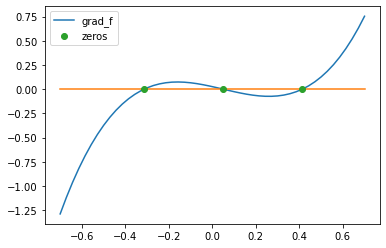

In [39]:
def grad_f(x):
    return 0.026 + - 0.5*x - 0.6*x**2 + 4*x**3

# Ploting
xs = np.linspace(-.7, .7)
ys = [grad_f(x) for x in xs]
plt.plot(xs, ys, label='grad_f')
plt.plot(xs, np.zeros(len(xs)))
plt.plot([0.41400549, -0.31400549, 0.05], [0, 0, 0], marker='o', linestyle='None', label='zeros')
plt.legend()

#### Factorize

- We now need to find the zeros of a cubic polynomial.
- The zeros of a polynomial are the points at which the curve crosses $y = 0$.
- We might try to factor this polynomial by hand.
- However, this method doesn't work in general.
- For our purposes, we can just use a numeric zero solver.

In [40]:
np.roots([4, -.6, -.5, 0.026])

array([ 0.41400549, -0.31400549,  0.05      ])

#### Aside: Checking our result

- It's always a good idea to check our result.
- Here, we can use [https://www.sympy.org/en/index.html](https://www.sympy.org/en/index.html) which is a **computer algebra system** (CAS) in python.
- [https://www.wolframalpha.com/](https://www.wolframalpha.com/) is another good CAS to use.
- To check our result, let's use all the zeros and see that it expands out to our original polynomial.

In [41]:
from sympy import expand, Symbol

x = Symbol('x')
expand(4*(x - 0.41400549)*(x + 0.31400549)*(x - 0.05))  # notice the factor of 4

4*x**3 - 0.6*x**2 - 0.49999998700056*x + 0.025999999350028

In [42]:
print(f(0.41400549))
print(f(-0.31400549))
print(f(0.05))

-0.004899999999999988
-0.004899999999999988
0.012656249999999997


So both
1. $\theta = 0.41400549$
2. $\theta = -0.31400549$
give us the minima. 

1. There is not a unique **local minima**, i.e.
$$
\exists \delta > 0, \forall \theta', |\theta - \theta'| < \delta
$$
In words, this means that there is some interval for which $\theta$ gives the smallest value.
2. They are both **global minima**, i.e., both points satisfy:
$$
\mathop{\mathrm{argmin}}_{\theta \in \Theta} f(\theta)
$$

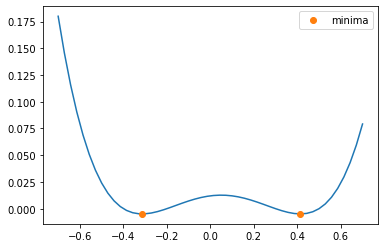

In [43]:
xs = np.linspace(-.7, .7)
ys = [f(x) for x in xs]
plt.plot(xs, ys)

plt.plot([0.41400549, -0.31400549], [f(0.41400549), f(-0.31400549)], marker='o', linestyle='None', label='minima')
plt.legend()

### Optimization Strategy 2: Grid Search

The simplest search.

In [44]:
def opt_1(f, thetas):
    # Create minimum
    best_val = f(thetas[0])
    best_theta = thetas[0]
    
    # Search
    for theta in thetas:
        tmp = f(theta)
        if tmp < best_val:
            best_val = tmp
            best_theta = theta
    
    # We are doing an argmin
    return best_theta

opt_1(f, np.linspace(-.7, .7))

0.41428571428571437

#### Optimization Strategy Graphically

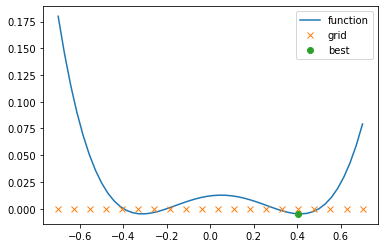

In [45]:
# Plot original function
xs = np.linspace(-.7, .7)
ys = [f(x) for x in xs]
plt.plot(xs, ys, label='function')

# Plot grid search
grid_size = 20
grid = np.linspace(-.7, .7, grid_size)
plt.plot(grid, np.zeros(len(grid)), marker='x', linestyle='None', label='grid')

# Plot optimization
best_theta = opt_1(f, grid)
plt.plot([best_theta], [f(best_theta)], marker='o', linestyle='None', label='best')
plt.legend()

#### Pros and Cons

Pros
1. Grid search is simple to implement.
2. Grid search requires us to know nothing about the function we are optimizing.
3. Grid search can be used

Cons
1. However grid search is inefficient. It will not scale to higher dimensions.
2. Grid search is sensitive to the size of the grid. You may find a different minima depending on the grid.
3. In particular, we did not find one of the minima. For some applications, it is enough to find one minima. For other applications, we need to find all of the minima. In general, we will not know if we have found all the minima or not.

### Optimization Strategy 3: Gradient Descent

1. One of the most powerful search methods ever invented.
2. Many variants, including ones used to train neural networks.

#### Aside: Taylor Series

The Taylor series of $f$ at $a$ is
$$
f(x) = f(a) + \frac{df}{dx}\bigg{|}_{x=a}\frac{(x-a)^1}{1!} + \frac{d^2f}{dx^2}\bigg{|}_{x=a}\frac{(x-a)^2}{2!} + \frac{d^3f}{dx^3}\bigg{|}_{x=a}\frac{(x-a)^3}{3!} + \dots
$$

#### Example:

Let's use our running example
\begin{align*}
f(x) & = 0.012 + 0.026x - 0.25x^2 - 0.2x^3 + x^4 \\
\end{align*}

Here are the derivatives for that function
\begin{align*}
\frac{df}{dx}(x) & = 0.026 - .5 x -.6x^2 + 4x^3 \\
\frac{d^2f}{dx^2}(x) & = -.5 -1.2x + 12x^2 \\
\frac{d^3f}{dx^3}(x) & = -1.2 + 24x \\
\frac{d^4f}{dx^4}(x) & = 24
\end{align*}

Let's put it together
\begin{align*}
f(x) & = f(a) + \frac{df}{dx}\bigg{|}_{x=a}\frac{(x-a)^1}{1!} + \frac{d^2f}{dx^2}\bigg{|}_{x=a}\frac{(x-a)^2}{2!} + \frac{d^3f}{dx^3}\bigg{|}_{x=a}\frac{(x-a)^3}{3!} + \frac{d^4f}{dx^4}\bigg{|}_{x=a}\frac{(x-a)^4}{4!}
\end{align*}

We can use sympy for this.

In [46]:
from sympy import simplify, factorial

x = Symbol('x')
a = Symbol('a')
f_a = 0.012 + 0.026*a -.25*a**2 - .2*a**3 + a**4
df_dx_a = (0.026 - .5*a -.6*a**2 + 4*a**3) * (x - a)/factorial(1)
d2f_dx2_a = (-.5 -1.2*a + 12*a**2) * (x - a)**2/factorial(2)
d3f_dx3_a = (-1.2 + 24*a) * (x - a)**3/factorial(3)
d4f_dx4_a = 24*(x - a)**4/factorial(4)
simplify(f_a + df_dx_a + d2f_dx2_a + d3f_dx3_a + d4f_dx4_a)  

1.0*x**4 - 0.2*x**3 - 0.25*x**2 + 0.026*x + 0.012

In [47]:
def taylor_f(a, x):
    # The Taylor expansion of f around a
    # It does not depend on a!
    return x**4 - .2*x**3 - .25*x**2 + 0.026*x + 0.012

Text(0.5, 1.0, 'Taylor Series')

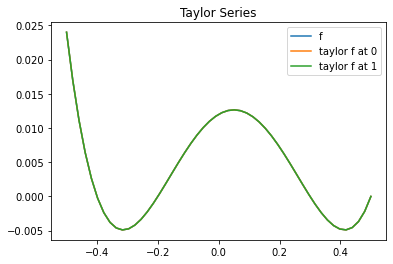

In [48]:
# Plot original function
xs = np.linspace(-.5, .5)
ys = [f(x) for x in xs]
plt.plot(xs, ys, label='f')
ys0 = [taylor_f(0, x) for x in xs]
ys1 = [taylor_f(1, x) for x in xs]
plt.plot(xs, ys0, label='taylor f at 0')
plt.plot(xs, ys0, label='taylor f at 1')
plt.legend()
plt.title('Taylor Series')

#### Example 2: Exponentials

Let's use the simple exponential function
\begin{align*}
f(x) & = \exp(x) \\
\end{align*}

Here are the derivatives for that function
\begin{align*}
\frac{df}{dx}(x) & = \exp(x) \\
\frac{d^2f}{dx^2}(x) & = \exp(x) \\
\frac{d^3f}{dx^3}(x) & = \exp(x) \\
\vdots & = \vdots
\end{align*}

Let's put it together
\begin{align*}
f(x) & = e^a + e^a\frac{(x-a)^1}{1!} + e^a\frac{(x-a)^2}{2!} + e^a\frac{(x-a)^3}{3!} + \dots
\end{align*}

Unlike before we have an infinite taylor expansion.

In [49]:
def taylor_exp_1(a, x):
    # We are truncating the expansion of to order 1
    e = np.exp(a)
    return e + e*(x-a)

def taylor_exp_2(a, x):
    # We are truncating the expansion of to order 2
    e = np.exp(a)
    return e + e*(x-a) + e*(x-a)**2/2

def taylor_exp_3(a, x):
    # We are truncating the expansion of to order 3
    e = np.exp(a)
    return e + e*(x-a) + e*(x-a)**2/2 + e*(x-a)**3/6

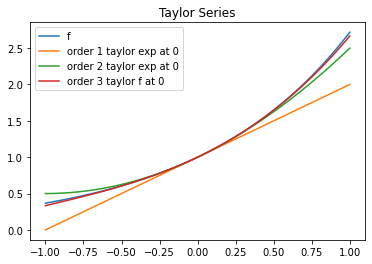

In [50]:
xs = np.linspace(-1, 1)
ys = [np.exp(x) for x in xs]
plt.plot(xs, ys, label='f')
ys1 = [taylor_exp_1(0, x) for x in xs]
ys2 = [taylor_exp_2(0, x) for x in xs]
ys3 = [taylor_exp_3(0, x) for x in xs]
plt.plot(xs, ys1, label='order 1 taylor exp at 0')
plt.plot(xs, ys2, label='order 2 taylor exp at 0')
plt.plot(xs, ys3, label='order 3 taylor f at 0')
plt.title('Taylor Series')
plt.legend()

#### Observations

1. There are two "variables" that we can control.
2. The first is the point at which put the expansion around. The expansion becomes less accurate the further we are from the point.
3. The second is the order of the expansion. Increasing the order of expansion increases the accuracy of the approximation (around the point).

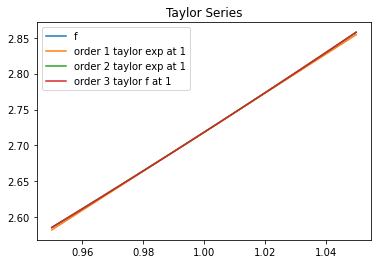

In [51]:
a = 1  # variable 1, point of expansion
xs = np.linspace(a -0.05, a + .05) # variable 2, interval around expansion
ys = [np.exp(x) for x in xs]
plt.plot(xs, ys, label='f')
ys1 = [taylor_exp_1(a, x) for x in xs]
ys2 = [taylor_exp_2(a, x) for x in xs]
ys3 = [taylor_exp_3(a, x) for x in xs]
plt.plot(xs, ys1, label=f'order 1 taylor exp at {a}')
plt.plot(xs, ys2, label=f'order 2 taylor exp at {a}')
plt.plot(xs, ys3, label=f'order 3 taylor f at {a}')
plt.title('Taylor Series')
plt.legend()

#### What does this have to do with gradient descent?

1. **Gradient descent** is an optimization algorithm that uses the idea that in an interval around a point (variable 1), a function is approximately the first order Taylor expansion (variable 2), i.e.,
$$
f(x) \approx f(a) + \frac{df}{dx}\bigg{|}_{x=a}(x - a) \,.
$$
2. This is just a "line":
$$
y = b + ax
$$
where
$f(x) = y$, $b = f(a) - \frac{df}{dx}\bigg{|}_{x=a}a$, and $a = \frac{df}{dx}\bigg{|}_{x=a}$.
3. How do we find the minima on a line in an interval?
4. It's exactly one of the two endpoints on the line!
5. The direction is given by the deriviative
$$
\frac{df}{dx}\bigg{|}_{x=a}
$$
6. If it is positive, we need to move left (i.e., negative of the derivative). If it is negative, we need to move right (i.e., negative of the derivative).

In [55]:
def f(x):
    return 0.012 + 0.026*x - 0.25*x**2 - 0.2*x**3 + x**4

def grad_f(x):
    return 0.026 + - 0.5*x - 0.6*x**2 + 4*x**3

def grad_desc(deriv_f, x_0, step_size, iterations=50):
    x = x_0
    trajectory = [x_0]
    for i in range(iterations):
        step = -deriv_f(x) * step_size # move the opposite of the derivative
        x += step
        trajectory += [x]  # save the trajectory of the points
    return x, trajectory

Text(0.5, 1.0, 'Gradient Descent')

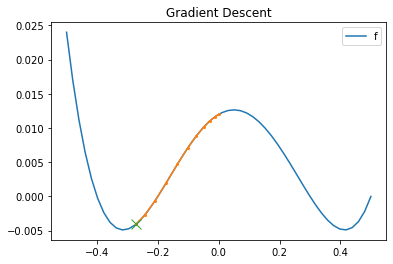

In [56]:
# Plot original function
xs = np.linspace(-.5, .5)
ys = [f(x) for x in xs]
plt.plot(xs, ys, label='f')

# Plot gradient descent
initial_pt = 0.0   # Play around with initial point
step_size = .5     # Play around with step size
iterations = 10    # Play around with number of iterations
minima, trajectory = grad_desc(grad_f, initial_pt, step_size, iterations=iterations)
plt.plot(trajectory, [f(x) for x in trajectory], marker='o', markersize=2)
plt.plot([minima], [f(minima)], marker='x', markersize=10)
plt.legend()
plt.title('Gradient Descent')

## Multivariate Continuous Optimization

1. So far, we have just looked at optimization in the 1d case.
2. This is great for building intuition, but for this to be useful, we really need multivariate continuous optimization, i.e., optimization in $D$ dimensions.
3. This means we need to generalize all our 1d optimization to $D$ dimensional optimization.
4. This $D$ dimensional generalization can take place inside a vector space which means we can apply linear algebra.

### 2-D Optimization

1. Let's start with $D=2$ optimization.
2. This way we can still visualize what's going on.

#### Example Function

Let $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ be a function defined as
$$
f(x) = \sin(x_1 x_2) x_1^2 \,.
$$

Thus $x = (x_1 \, x_2)$ is a vector.

In [54]:
def f(x: np.ndarray) -> float:
    # Implementation
    return np.sin(x[0] * x[1]) * x[1]**2

#### Graphing the function

<IPython.core.display.Javascript object>


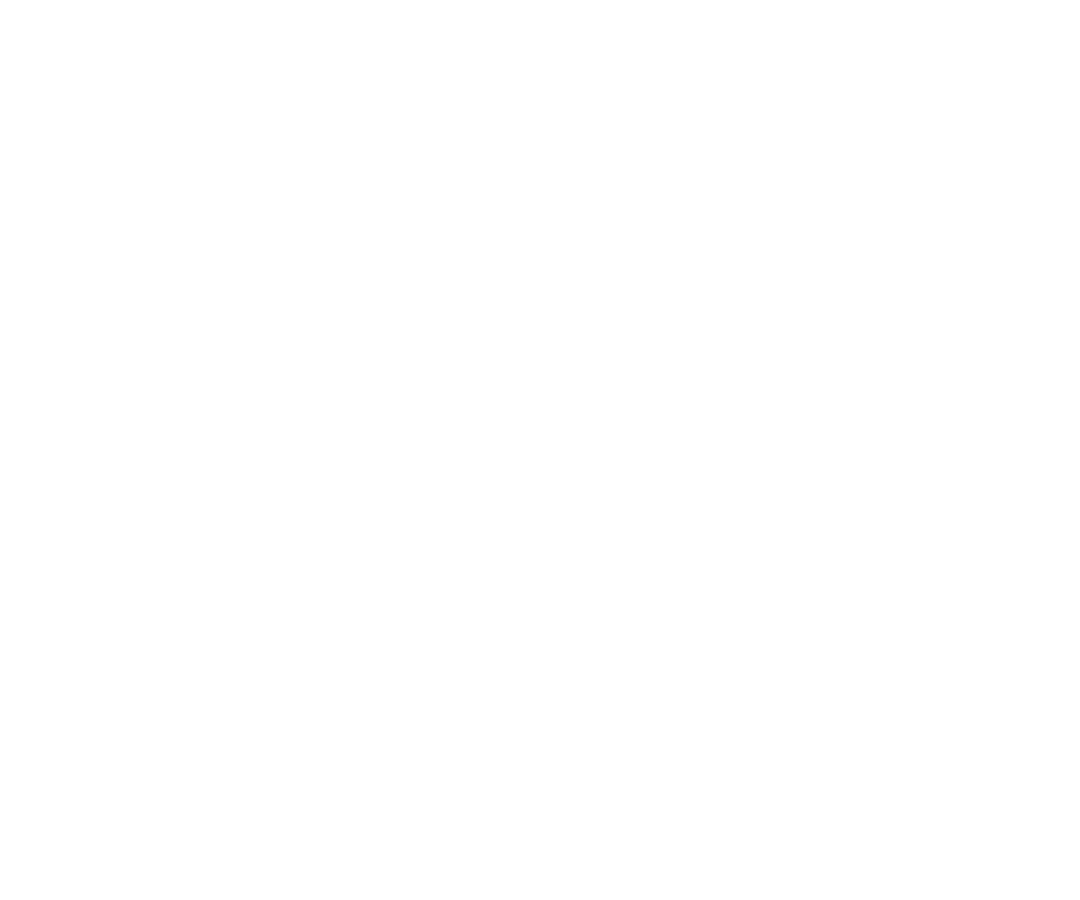

<Axes3DSubplot:>

In [20]:
%matplotlib notebook

def plot_function(x, y, f, alpha=1.):
    # Create the inputs
    xx, yy = np.meshgrid(x, y, indexing='ij') # Grid of |x| * |y| values
    # Evaluate function
    zz = np.array([[f([xx[i, j], yy[i, j]]) for j in range(len(y))] for i in range(len(x))])
    # Plot function
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, zz, alpha=alpha)
    return ax

x = np.linspace(-3.5, 3.5, 50)   # 50 values between -3.5 and 3.5
y = np.linspace(-3.5, 3.5, 50)   # 50 values between -3.5 and 3.5
plot_function(x, y, f)

### Optimization Strategy 1: Pencil-Paper

As with 1D derivative, a necessary condition for finding a local minima, maxima, or saddle point is that
$$
\nabla f(x) = 0 \,.
$$

As a reminder:
$$
f(x) = \sin(x_1 x_2) x_1^2 \,.
$$

The partial deriviatives are
\begin{align*}
\frac{\partial f}{\partial x_1} & = x_2 \cos(x_1 x_2) x_1^2 + 2 \sin(x_1 x_2) x_1 \\
\frac{\partial f}{\partial x_2} & = \cos(x_1 x_2) x_1^3
\end{align*}

Thus the gradient is
$$
\nabla f(a) = \begin{pmatrix}
\frac{\partial f}{\partial x_1}\bigg{|}_{x=a} \\
\frac{\partial f}{\partial x_2}\bigg{|}_{x=a} \\
\end{pmatrix}
$$

In [21]:
def grad_f_x1(x: np.ndarray) -> float: 
    return x[0] * (x[0] * x[1] * np.cos(x[0]*x[1]) + 2.*np.sin(x[0]*x[1]))

def grad_f_x2(x: np.ndarray) -> float:
    return np.cos(x[0] * x[1]) * x[1]**3

<IPython.core.display.Javascript object>


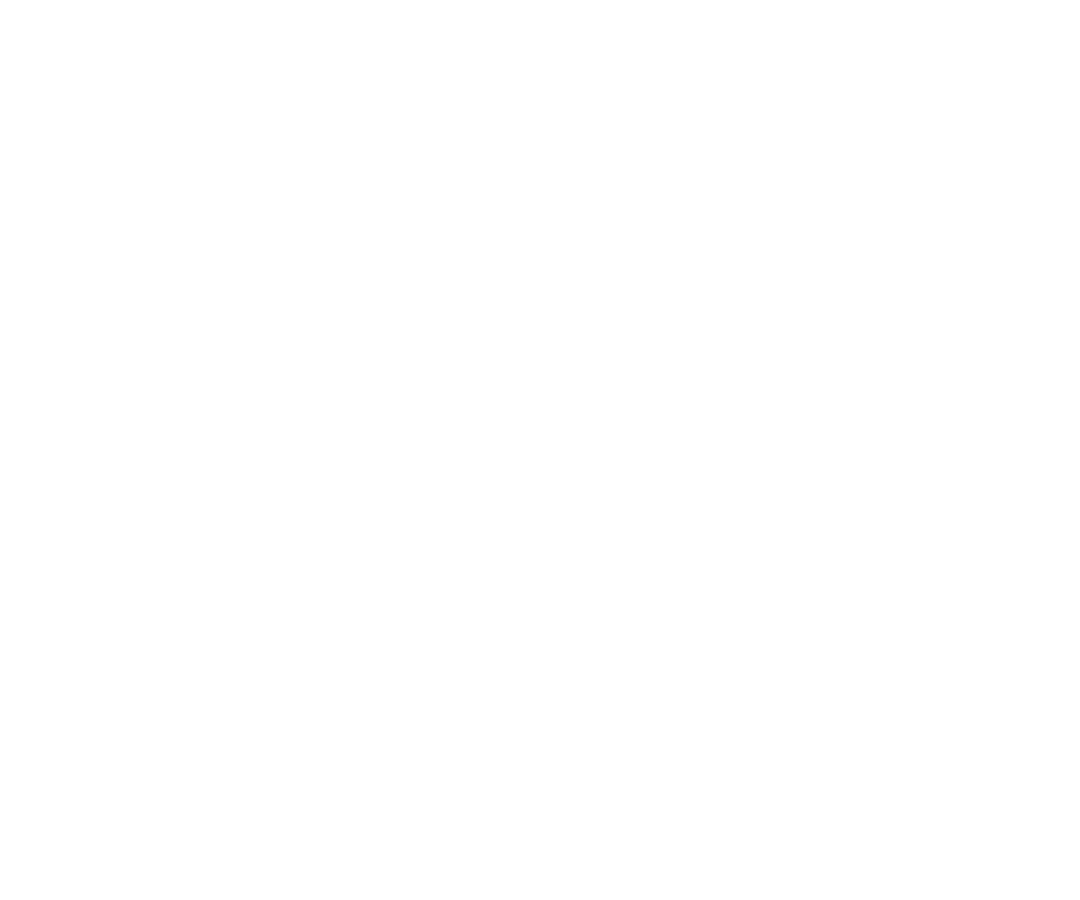

In [22]:
# Create the inputs
x = np.linspace(-3.5, 3.5, 50)
y = np.linspace(-3.5, 3.5, 50)
xx, yy = np.meshgrid(x, y, indexing='ij') # Grid of 40^2 values

# Evaluate function
grad_z1 = np.array([[grad_f_x1([xx[i, j], yy[i, j]]) for j in range(len(y))] for i in range(len(x))])
grad_z2 = np.array([[grad_f_x2([xx[i, j], yy[i, j]]) for j in range(len(y))] for i in range(len(x))])
            
# Plot function
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, grad_z1, alpha=.2)
ax.plot_surface(xx, yy, grad_z2, alpha=.2)

Thus we need to solve

\begin{align}
x_2 \cos(x_1 x_2) x_1^2 + 2 \sin(x_1 x_2) x_1 & = 0 \\
\cos(x_1 x_2) x_1^3 & = 0
\end{align}

#### Trying to solve this analytically ... 

First, we can examine the non-trigonometric functions.
1. When $x_1 = 0$, $x_2$ can be anything, and so this is one solution.
2. When $x_2 = 0$, then we that $x_1 = 0$ is forced, but this is captured in $1$.

Next, we can examine the trigonometric functions.
1. When $\cos(x_1 x_2) = 0$, this means $x_1 x_2 = N\pi/2$. This forces $x_1 = 0$ which is contained in the previous solution.
2. We can also have $\cos(x_1 x_2) = -2 \frac{\sin(x_1 x_2)}{x_1 x_2}$ (whenever $x_1, x_2$ are not $0$).
    - This means that we have $-2 \frac{\sin(x_1 x_2)}{x_1 x_2} x_1^3 = 0$.
    - Which means that we have $x_1x_2 = N\pi$ for any integer multiple $N$.
    
Finally, we have to check which solutions are minima or maxima ...

<IPython.core.display.Javascript object>


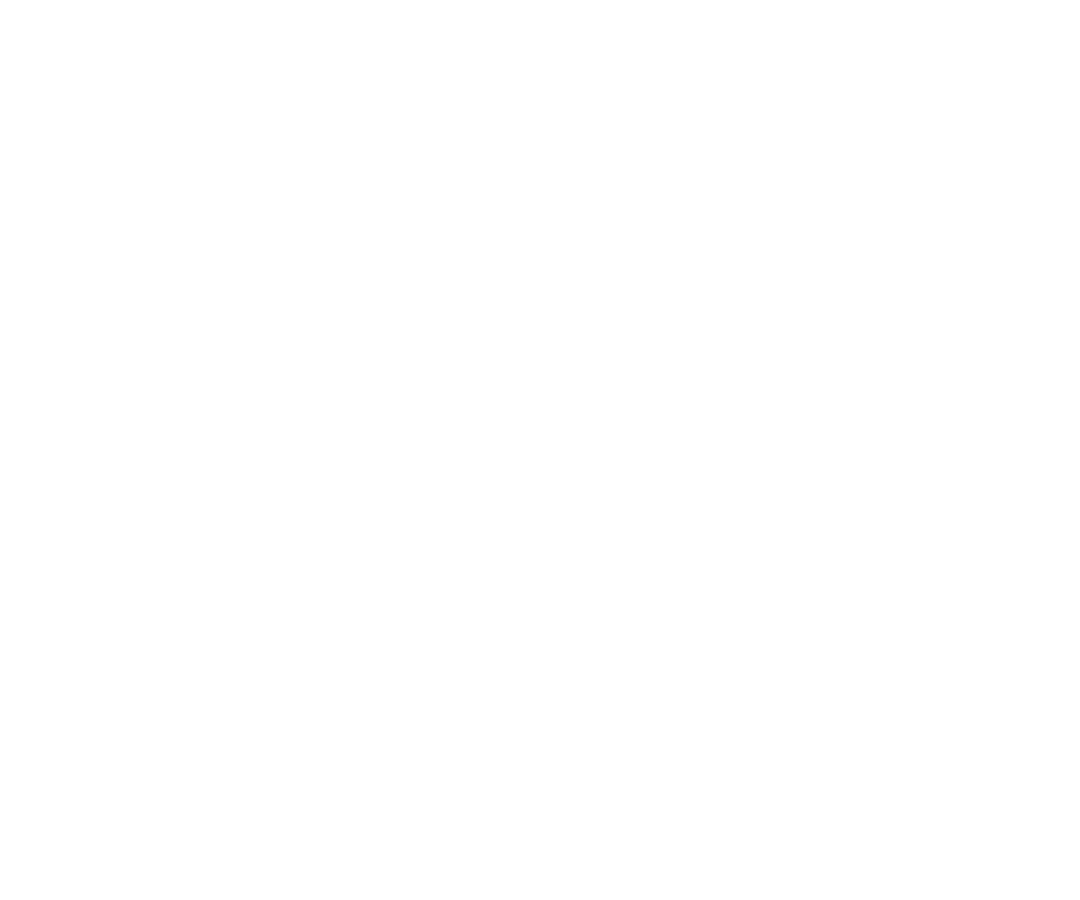

In [23]:
%matplotlib notebook

def plot_manual_solution(ax):
    # Solution 1
    xs = np.zeros(50)
    ys = np.linspace(-3.5, 3.5, len(xs))
    zs = np.array([f(np.array([xs[i], ys[i]])) for i in range(len(xs))])
    ax.plot3D(xs, ys, zs, linewidth=4)

    # Solution 2
    def create_x1_x2(N):
        x1s_1, x2s_1 = [], []
        for x1 in np.linspace(-3.5, 3.5, 50):
            x2 = N*np.pi / x1
            if x2 > -3.5 and x2 < 3.5:
                x1s_1 += [x1, x2]
                x2s_1 += [x2, x1]
        return x1s_1, x2s_1
    x1s_1, x2s_1 = create_x1_x2(1)
    zs2_1 = np.array([f(np.array([x1s_1[i], x2s_1[i]])) for i in range(len(x1s_1))])
    ax.scatter(x1s_1, x2s_1, zs2_1)
    # ax.plot3D(x1s_1, x2s_1, zs2_1, marker='o', linestyle='None', linewidth=4)
    x1s_1, x2s_1 = create_x1_x2(-1)
    zs2_1 = np.array([f(np.array([x1s_1[i], x2s_1[i]])) for i in range(len(x1s_1))])
    ax.scatter(x1s_1, x2s_1, zs2_1)

ax = plot_function(np.linspace(-3.5, 3.5, 50), np.linspace(-3.5, 3.5, 50), f, alpha=0.5)
plot_manual_solution(ax)

#### Ok ... What's your point?

1. That was pretty complicated and took a lot of thinking to get right? Is it right? How would you know?
2. And this was only for a 2D function where we had familiar functions. What if we had more complex functions?
3. The 1-D case is the simplest one. The optimization strategies that we invented from before will be more useful in higher dimensions.

### Optimization Strategy 2: Grid Search


In [24]:
def opt_2(f, thetas1, thetas2):
    # Create minimum
    best_val = f(np.array([thetas1[0], thetas2[0]]))
    best_theta = np.array([thetas1[1], thetas2[0]])
    
    # Search
    for theta1 in thetas1:
        for theta2 in thetas2:
            tmp = f(np.array([theta1, theta2]))
            if tmp < best_val:
                best_val = tmp
                best_theta = np.array([theta1, theta2])
    
    # We are doing an argmin
    return best_theta

<IPython.core.display.Javascript object>


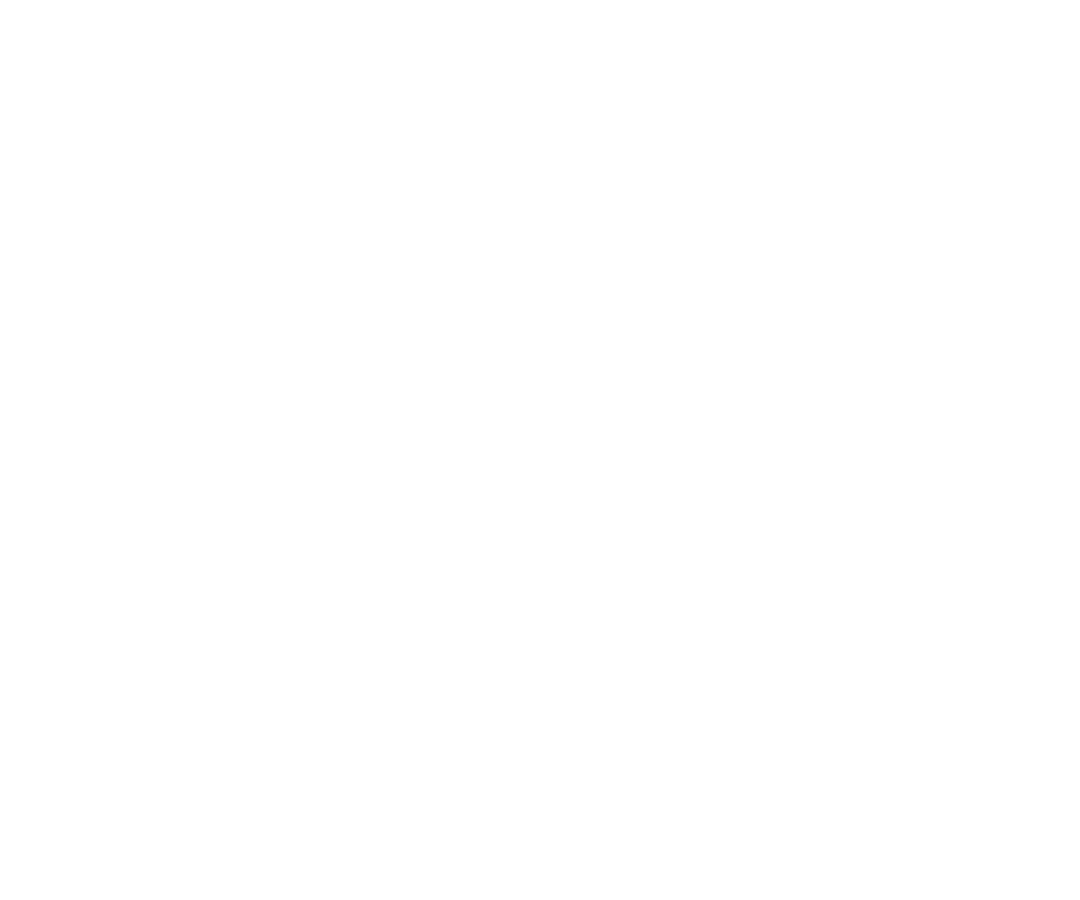

In [25]:
ax = plot_function(np.linspace(-3.5, 3.5, 50), np.linspace(-3.5, 3.5, 50), f, alpha=0.5)
minima = opt_2(f, np.linspace(-3.5, 3.5, 50), np.linspace(-3.5, 3.5, 50))
plot_manual_solution(ax)
ax.scatter([minima[0]], [minima[1]], [f(minima)], marker='x', s=100)

### Optimization Strategy 3: Gradient Descent

1. We might wonder if gradient descent generalizes to multiple dimensions.
2. It does through the multivariate Taylor expansion.

#### Multivariate Taylor Expansion

Suppose $f: R^D \rightarrow R$ is $k+1$-times differentiable on a suitably nice set S (open convex set). If $a \in S$ and $a + h \in S$, then
$$
f(a + h) \approx \sum_{|\alpha| \leq k } \frac{\partial}{\partial \alpha} f(a) \frac{h^{\alpha}}{\alpha!}
$$
where

1. $\alpha = (\alpha_1, \dots, \alpha_D)$ is a multi-index, i.e., $|\alpha| = \sum_{i=1}^D \alpha_i = D$ and each $\alpha_i$ is an integer number.
2. $\alpha ! = \alpha_1 ! \dots \alpha_D!$
3. $\frac{\partial}{\partial \alpha} = \frac{\partial}{\partial x_1^{\alpha_1} \dots \partial x_D^{\alpha_D}}$
4. $h^{\alpha} = h_1^{\alpha_1} \dots h^D{\alpha_D}$

[https://sites.math.washington.edu/~folland/Math425/taylor2.pdf](https://sites.math.washington.edu/~folland/Math425/taylor2.pdf)

#### k = 0

Note that $\alpha = (0, \dots, 0)$.

Thus
\begin{align*}
f(a + h) & \approx \frac{\partial}{\partial (0, \dots, 0)}f(a) h^{(0, \dots, 0)} \\
& = f(a)
\end{align*}

#### k = 1

\begin{align*}
f(a + h) & \approx \sum_{|\alpha|=0} \frac{\partial}{\partial \alpha} f(a) \frac{h^{\alpha}}{\alpha!} + \sum_{|\alpha|=1} \frac{\partial}{\partial \alpha} f(a) \frac{h^{\alpha}}{\alpha!} \\
& = f(a) + \nabla f(a)h
\end{align*}

#### k = 2

\begin{align*}
f(a + h) & \approx \sum_{|\alpha| \leq 1} \frac{\partial}{\partial \alpha} f(a) \frac{h^{\alpha}}{\alpha!} + \sum_{|\alpha|=2} \frac{\partial}{\partial \alpha} f(a) \frac{h^{\alpha}}{\alpha!} \\
& = (f(a) + \nabla f(a)h) + \frac{1}{2}h^T H(f)(a) h
\end{align*}

where

$$
H(f)(x) = \begin{pmatrix}
\frac{\partial^2 f}{\partial x_1^2}(x) & \dots & \frac{\partial^2 f}{\partial x_1 x_D}(x) \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_D x_1}(x) & \dots & \frac{\partial^2 f}{\partial x_D^2}(x) \\
\end{pmatrix}
$$
is called the **Hessian** matrix.

#### k = 3 

Use the formula ...

#### Summary

We can control our approximation to a multivariate function $f$ similarly to our approximation to a univariate function.
1. First, we can control the order of approximation $k$.
    - This is where computational complexity comes in.
    - An approximation of order $k$ requires $O(D^k)$ complexity.
    - So for high-dimensions $D$, large $k$ is impractical.
2. Second, we can control the size of the neighborhood, i.e., the step size $h$.
    - The approximation will be better the smaller $h$ is.

### Multivariate gradient descent

Same algorithm ...

In [26]:
def grad_f_x1(x: np.ndarray) -> float: 
    return x[0] * (x[0] * x[1] * np.cos(x[0]*x[1]) + 2.*np.sin(x[0]*x[1]))

def grad_f_x2(x: np.ndarray) -> float:
    return np.cos(x[0] * x[1]) * x[0]**3

def grad_f(x: np.ndarray) -> np.ndarray:
    return np.array([grad_f_x1(x), grad_f_x2(x)])

In [27]:
def grad_desc(deriv_f, x_0, step_size, iterations=50):
    x = np.array(x_0)
    trajectory = [x_0]
    for i in range(iterations):
        step = -deriv_f(x) * step_size # move the opposite of the derivative
        x += step
        trajectory += [np.array(x)]  # save the trajectory of the points
    return x, trajectory

<IPython.core.display.Javascript object>


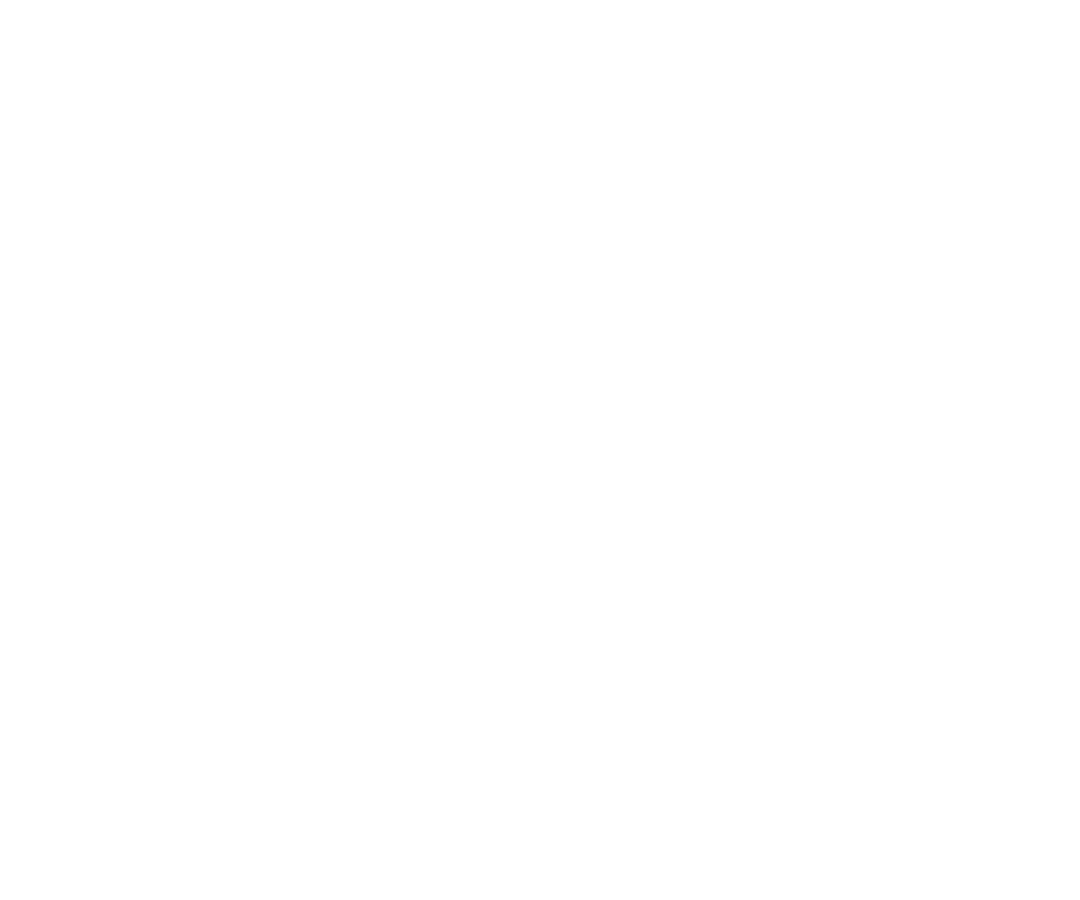

Minima [-9.13754488e-04 -8.84815689e+00] Value 0.6329701590141422 Grad [-2.21628307e-05 -7.62911874e-10]


In [28]:
# Create the inputs
x = np.linspace(-3,3,50)
y = np.linspace(-3,3,50)
xx, yy = np.meshgrid(x, y, indexing='ij')

# Evaluate function
z = np.array([[f([xx[i, j], yy[i, j]]) for j in range(len(y))] for i in range(len(x))])

# Plot function
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, alpha=.5)

# Minimize
# initial_pt = np.array([0., 1.])   # TODO: change me
initial_pt = np.array([.2, -.2], dtype=np.float64)   # TODO: change me
step_size = .5                  # TODO: change me
iterations = 100                    # TODO: change me
minima, trajectory = grad_desc(grad_f, initial_pt, step_size, iterations=iterations)
print("Minima", minima, "Value", f(minima), "Grad", grad_f(minima))
ax.scatter([initial_pt[0]], [initial_pt[1]], [f(initial_pt)], c='red', s=100)
ax.scatter([minima[0]], [minima[1]], [f(minima)], c='green', s=100, marker='x')
ax.scatter([x[0] for x in trajectory], [x[1] for x in trajectory], [f(x) for x in trajectory])
plot_manual_solution(ax)

### Questions

1. Does each step of gradient descent always decrease the value of the function?
2. Is it possible for gradient descent to find different minima? When would this happen?
3. Is it possible for gradient descent to not terminate (using a non-iteration termination condition)?

## Back to Linear Regression

Let's apply our 1D optimization techniques to a 1D linear regression to build some intuition.

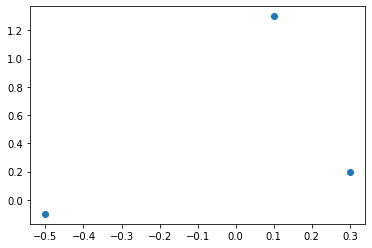

In [29]:
%matplotlib inline

x1 = [0.3]                     # each point has dimension 1
x2 = [-0.5]               
x3 = [.1]                
Y = [0.2, -.1, 1.3]
X = np.array([x1, x2, x3])   # each row is one point

plt.plot(X[:,0], Y, marker='o', linestyle='none')

### Loss Function

Suppose we have a dataset $\{(x_i, y_i)_{1 \leq i \leq N}\}$.
Then the sum-of-squares loss is:
\begin{align*}
Loss(\theta; \{(x_i, y_i)_{1 \leq i \leq N}\}) & = \sum_{i=1}^N (f_\theta(x_i) - y_i)^2
\end{align*}

### Minimize Loss Function

We would like to minimize the loss function
\begin{align*}
Loss(\theta; \{(x_i, y_i)_{1 \leq i \leq N}\}) & = \sum_{i=1}^N (f_\theta(x_i) - y_i)^2
\end{align*}

In [30]:
def loss(X, Y, theta):
    total_loss = 0.0
    for i, y in enumerate(Y):
        total_loss += (y - (theta[0] * X[i,:0] + theta[1]))**2
    return total_loss

#### Gradient of the Loss Function

$$
\frac{\partial L(X, Y, \theta)}{\partial \theta} = \sum_{i=1}^N 2 (\frac{\partial}{\partial \theta}f_\theta(x_i))(f_\theta(x_i) - y_i)
$$

$$
f_\theta(x) = \theta_0 x + \theta_1
$$

$$
\frac{\partial f_\theta(x)}{\partial \theta} = \begin{pmatrix}
x \\
1
\end{pmatrix}
$$

In [31]:
def grad_loss_0(X, Y, theta):
    total = 0.0
    for i, y in enumerate(Y):
        total += 2. * X[i,:][0] * (theta[0] * X[i,:][0] + theta[1] - Y[i])
    
    return total

def grad_loss_1(X, Y, theta):
    total = 0.0
    for i, y in enumerate(Y):
        total += 2. * (theta[0] * X[i,:][0] + theta[1] - Y[i])
    return total

def grad_loss(X, Y, theta):
    return np.array([grad_loss_0(X, Y, theta), grad_loss_1(X, Y, theta)])

## Gradient Descent!

In [32]:
from functools import partial

f = partial(grad_loss, X, Y)
minima, trajectory = grad_desc(f, np.array([1., 1.]), 8e-2, iterations=50)
minima

array([0.83802646, 0.49464917])

Text(0.5, 1.0, 'Line of Best Fit')

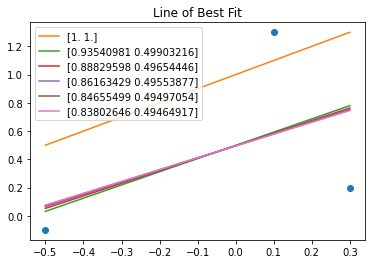

In [33]:
plt.plot(X[:,0], Y, marker='o', linestyle='none')
xs = np.linspace(-.5, .3)
for i in range(0, len(trajectory), 10):
    ys = [trajectory[i][0] * x + trajectory[i][1] for x in xs]
    plt.plot(xs, ys, label=f'{trajectory[i]}')
plt.legend()
plt.title('Line of Best Fit')

### Comparison with Linear Algebra Solution

In [34]:
def linear_algebra_solve(X, Y):
    X_p = np.concatenate([X, np.ones((3, 1))], axis=1)
    return np.linalg.solve(X_p.transpose() @ X_p, X_p.transpose() @ Y)

print("Gradient descent solution", minima)
print("Linear algebra solution", linear_algebra_solve(X, Y))

Gradient descent solution [0.83802646 0.49464917]
Linear algebra solution [0.82692308 0.49423077]


1. We got the "same" answer!
2. Because the linear algebra solution is also the same as the probabilistic solution, we now have three views of linear regression: linear algebra, probabilistic, and optimization.
3. This is important because each view may be better for different purposes.
    - For example, the probabilistic perspective introduces new modeling perspectives and enables us to quantify uncertainty.
    - The optimization purpose is the easiest to generalize to higher dimensions.
    - The linear algebra perspective is elegant??

### Aside: Composition of Strategies

1. When we first introduced the probabilistic perspective of linear regression, we had to optimize with a grid search.
2. Now that we have "learned" gradient descent, we can obviously use it to optimize the conditional density.

### Recall the Probabilistic Model

\begin{align*}
p(y^i | x^i; \theta) & = \frac{1}{\sqrt{2\pi\sigma^2}}e^{(y^i - (\sum_{d=1}^D \theta_d x_d^i + \theta_{d+1}))^2/(2\sigma^2)} \\
p(y | x; \theta) & = \prod_{i=1}^N p(y^i | x^i; \theta)
\end{align*}

#### Log trick

The logarithm is a very useful function in probabilistic machine learning.

/var/folders/dl/6vfhry6x017fzhzfjpj32c7h0000gq/T/ipykernel_74792/19289234.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.linspace(1e-9, 3.), np.log(np.linspace(0., 3.)))


Text(0.5, 1.0, 'Logarithm')

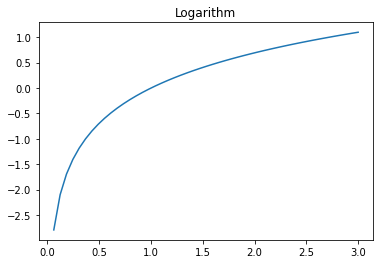

In [35]:
plt.plot(np.linspace(1e-9, 3.), np.log(np.linspace(0., 3.)))
plt.title('Logarithm')

#### 1. Logarithm is Concave

A function $f$ is **concave** if
$$
f((1-\alpha )x+\alpha y)\geq (1-\alpha )f(x)+\alpha f(y)
$$
for any $\alpha$.

In words, this means that any line connecting two points a and b on $f$ lies entirely below $f$ on the interval $(a, b)$.

#### Consequence of Concavity

There is an important "fact":
$$
\mathop{\mathrm{argmin}} f(x) = \mathop{\mathrm{argmin}} \log(f(x))
$$
This means that minimizing $f$ is equivalent to minimizing $\log(f(x))$

#### 2. Logarithm turns multiplication into addition

This is useful as a mathematical trick, as well as for managing the intricacies of floating-point arithmetic.

\begin{align*}
\log p(y | x; \theta) & = \sum_{i=1}^N \log p(y^i | x^i; \theta)
\end{align*}

### Log Conditional Density

\begin{align*}
\log p(y^i | x^i; \theta) & = \log(\frac{1}{\sqrt{2\pi\sigma^2}}) + (y^i - (\sum_{d=1}^D \theta_d x_d^i + \theta_{d+1}))^2/(2\sigma^2) \\
\log p(y | x; \theta) & = \sum_{i=1}^N \log p(y^i | x^i; \theta)
\end{align*}

### Gradients

\begin{align*}
\frac{\partial}{\partial \theta_d} \log p(y^i | x^i; \theta) & = 2x_d^i(y^i - (\sum_{d=1}^D x_d^i \theta_d + \theta_{d+1}))/(2\sigma^2) \\
\frac{\partial}{\partial \theta_{d+1}} \log p(y^i | x^i; \theta) & = 2(y^i - (\sum_{d=1}^D x_d^i \theta_d + \theta_{d+1}))/(2\sigma^2) \\
\log p(y | x; \theta) & = \sum_{i=1}^N \frac{\partial}{\partial \theta} \log p(y^i | x^i; \theta)
\end{align*}

### The Mystery of the Variance

Simplifying the gradients
\begin{align*}
\frac{\partial}{\partial \theta_d} \log p(y^i | x^i; \theta) & = \frac{1}{\sigma^2}x_d^i(y^i - (\sum_{d=1}^D x_d^i \theta_d + \theta_{d+1})) \\
\frac{\partial}{\partial \theta_{d+1}} \log p(y^i | x^i; \theta) & = \frac{1}{\sigma^2}(y^i - (\sum_{d=1}^D x_d^i \theta_d + \theta_{d+1})) \\
\log p(y | x; \theta) & = \sum_{i=1}^N \frac{\partial}{\partial \theta} \log p(y^i | x^i; \theta)
\end{align*}

1. We realize that this is exactly the gradients for the sum-of-squares, with the exception of the factor $1/\sigma^2$!
2. This controls the step size in gradient descent.

## Summary

1. We saw 1D optimization, including Taylor Series + gradient descent.
2. We saw multivariate optimization, including multivariate Taylor Series + gradient descent.
3. We only saw these concepts in the context of linear regression, they underly the fundamentals of deep learning, and are broadly applicable in many scientific applications.